In [1]:
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import numpy as np
import os
from pathlib import Path
import json
import collections
from src.visualize import filter_path_1, filter_path_2, get_scores, get_scores_json, plot_scores, calculate_average_ranking, calculate_average_score

In [2]:
results_path = "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/results"
bigbench_path = os.path.join(results_path, "BIGBENCH")
mmlu_path = os.path.join(results_path, "MMLU")

with open(os.path.join(bigbench_path, "average_score.json")) as f:
    bigbench_results = json.load(f)

with open(os.path.join(bigbench_path, "average_ranking.json")) as f:
    bigbench_ranking = json.load(f)

with open(os.path.join(mmlu_path, "average_score.json")) as f:
    mmlu_results = json.load(f)

with open(os.path.join(mmlu_path, "average_ranking.json")) as f:
    mmlu_ranking = json.load(f)

In [3]:
bigbench_results

{'c4 NLI': {'1.4B': 0.3121110448242667, '160M': 0.30824651576705303},
 'c4 Commonsense': {'1.4B': 0.30988872364436565, '160M': 0.298433430893875},
 'c4 Summarization': {'1.4B': 0.30974081812929927, '160M': 0.2966027077403762},
 'c4 QA': {'1.4B': 0.3071672672642373, '160M': 0.2978883375663244},
 'c4': {'1.4B': 0.30275715795899033, '160M': 0.29799745912976094}}

In [4]:
overall_results = collections.defaultdict(lambda: collections.defaultdict(float))
overall_ranking = collections.defaultdict(lambda: collections.defaultdict(float))
for training_set in bigbench_results.keys():
    for model in bigbench_results[training_set].keys():
        overall_results[training_set][model] = np.mean([bigbench_results[training_set][model], mmlu_results[training_set][model]])
        overall_ranking[training_set][model] = np.mean([bigbench_ranking[training_set][model], mmlu_ranking[training_set][model]])


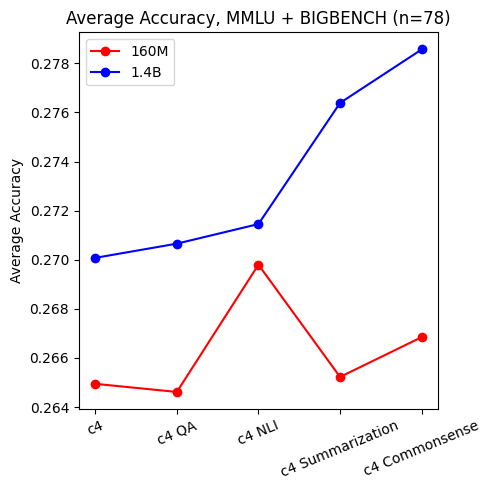

In [5]:
from src.visualize import plot_accuracy_line

PARAM_SIZES = ['160M', '1.4B']
DATASET_ORDER = ["c4", "c4 QA", "c4 NLI", "c4 Summarization", "c4 Commonsense"]
METRICS = {'acc': 'acc', 'std': 'acc_stderr'}
TITLE = "Average Accuracy, MMLU + BIGBENCH (n=78)"
plot_accuracy_line(overall_results, PARAM_SIZES, DATASET_ORDER, title=TITLE)


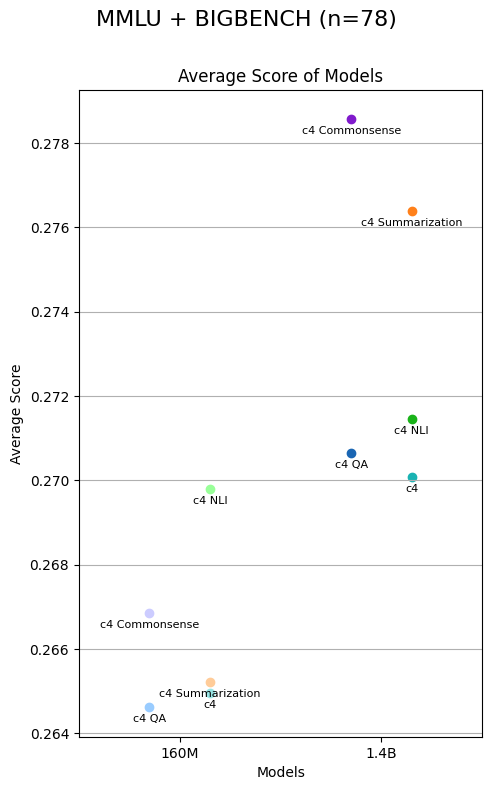

In [6]:
model_to_color = {
    'c4 QA 160M': (0.6, 0.8, 1.0, 1.0),  # Lighter blue
    'c4 QA 1.4B': (0.1, 0.4, 0.7, 1.0),  # Darker blue
    'c4 Summarization 160M': (1.0, 0.8, 0.6, 1.0),  # Lighter orange
    'c4 Summarization 1.4B': (1.0, 0.5, 0.1, 1.0),  # Darker orange
    'c4 NLI 160M': (0.6, 1.0, 0.6, 1.0),  # Lighter green
    'c4 NLI 1.4B': (0.1, 0.7, 0.1, 1.0),  # Darker green
    'c4 Commonsense 160M': (0.8, 0.8, 1.0, 1.0),  # Lighter purple
    'c4 Commonsense 1.4B': (0.5, 0.1, 0.8, 1.0),  # Darker purple
    'c4 160M': (0.6, 0.9, 0.9, 1.0),  # Lighter cyan
    'c4 1.4B': (0.1, 0.7, 0.7, 1.0)  # Darker cyan
}

TITLE = "MMLU + BIGBENCH (n=78)"
from src.visualize import plot_model_performance

# Sort the keys of the outer dictionary
sorted_overall_results = {k: overall_results[k] for k in sorted(overall_results)}

plot_model_performance(overall_results, model_to_color, TITLE)

In [7]:
sorted_overall_results

{'c4': defaultdict(float,
             {'1.4B': 0.2700772708919513, '160M': 0.2649460496679148}),
 'c4 Commonsense': defaultdict(float,
             {'1.4B': 0.2785672219447055, '160M': 0.26684750148336733}),
 'c4 NLI': defaultdict(float,
             {'1.4B': 0.27145424628456033, '160M': 0.2697990585654213}),
 'c4 QA': defaultdict(float,
             {'1.4B': 0.2706561321215344, '160M': 0.2646148253190751}),
 'c4 Summarization': defaultdict(float,
             {'1.4B': 0.2763892635661194, '160M': 0.2652267957661905})}

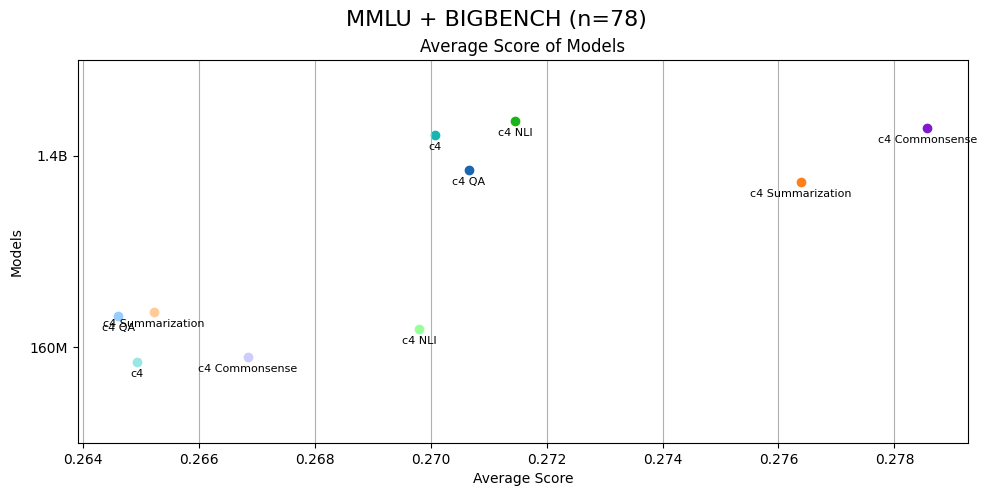

In [8]:
from src.visualize import plot_model_performance_horizontal
sorted_overall_results = {k: overall_results[k] for k in sorted(overall_results)}

plot_model_performance_horizontal(sorted_overall_results, model_to_color, TITLE)

In [9]:
sorted_overall_results

{'c4': defaultdict(float,
             {'1.4B': 0.2700772708919513, '160M': 0.2649460496679148}),
 'c4 Commonsense': defaultdict(float,
             {'1.4B': 0.2785672219447055, '160M': 0.26684750148336733}),
 'c4 NLI': defaultdict(float,
             {'1.4B': 0.27145424628456033, '160M': 0.2697990585654213}),
 'c4 QA': defaultdict(float,
             {'1.4B': 0.2706561321215344, '160M': 0.2646148253190751}),
 'c4 Summarization': defaultdict(float,
             {'1.4B': 0.2763892635661194, '160M': 0.2652267957661905})}